
<font size="10">Assignment 1</font>

### 1) What conclusions can you draw about sales performance of various products and regions?
<p> For Product, the best selling product is Product_5 and worst selling product is Product_3. The top 10 best selling products are 'Product_50', 'Product_30', 'Product_2', 'Product_48', 'Product_16', 'Product_40', 'Product_29', 'Product_19', 'Product_4', 'Product_13', list in descending order. Can refer to part 2.2</p>
<p> For Region, Region_9 is having the best performance, while Region_7 is having the worst. The sales performance is in the following order : 'Region_9', 'Region_8', 'Region_4', 'Region_10', 'Region_5', 'Region_2', 'Region_3', 'Region_6', 'Region_1', 'Region_7'. Can refer to part 2.3 </p>
  
### 2) What recommendations do you have for the business?
<p> 1. I would recommend the business to </p>

### 3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?
<p> 1. Drop all the duplicated rows and missing value: I used drop_duplicates() to drop the duplicated rows, since each rows means one transaction, it is impossible for the same transaction to happen with same price, units sold on the same date. For missing value, I drop the rows with missing value in Product and Units Sold column. Since we need to analyze the sales performance of products and price. For further explaination and codes, please refer to part (1.1) </p>
<p> 2. Remove outliers: I used drop() to drop the outliers for the price rows but not for the unit sold row, as the price row is having a larger variation in data. For further explaination and codes, please refer to part (1.2) </p>
<p> 3.  Fill Null value for Price and Unit sold columns: I used fillna() to fill all the missing value in price and units sold column with the means. Since I don't need to drop the rows and this method can retain the overall distribution of the data and preserve the mean. For further explaination and codes, please refer to part (1.3) </p>

In [102]:
# import all the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [103]:
# load csv
df = pd.read_csv("https://raw.githubusercontent.com/kaka5050/MBAN-6110/main/Asg%201/sales_data.csv")

In [104]:
# show the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


There are 1050 rows

In [105]:
# show the describtion of the data
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


-There are 50 products selling in 10 Regions

# Data Cleaning (1.1): Drop duplicated rows and rows with missing values 

In [106]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     900 non-null    object 
 1   Region      900 non-null    object 
 2   Price       900 non-null    float64
 3   Units Sold  900 non-null    float64
 4   Sale Date   1000 non-null   object 
dtypes: float64(2), object(3)
memory usage: 46.9+ KB


In [107]:
# show how many rows are having missing value in each column
null_counts = df.isnull().sum()
print(null_counts)

Product       100
Region        100
Price         100
Units Sold    100
Sale Date       0
dtype: int64


There are + 100 of null values in the 4 columns excluding 'Sales Date', so I will try to clean up all the rows with null value and see how many rows are remaining.

In [108]:
# clean all the rows with null value and see how many rows are left in the cleaned data
df_clean_noNull = df.dropna()
rows_left = df_clean_noNull.count()
print(rows_left)

Product       651
Region        651
Price         651
Units Sold    651
Sale Date     651
dtype: int64


In [109]:
# calculate the percentage of rows being cleaned up 
1 - 687/1050

0.34571428571428575

<p>If I clean up all the rows with null value, I am cleaning up close to 35% of rows. I think this is too much.</p> 
<P>I will try to remove the rows with null value in column 'Products' and 'Region' instead of all the rows with null value. See how many percent of data are left.</p>

In [111]:
# remove all the rows with null value in column 'Product' and 'Region'
df_clean_ProductRegion = df.dropna(subset=['Product','Region'])

# reset all the index
df_clean_ProductRegion.reset_index(drop=True, inplace=True)

# show the info of the data
df_clean_ProductRegion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     810 non-null    object 
 1   Region      810 non-null    object 
 2   Price       725 non-null    float64
 3   Units Sold  731 non-null    float64
 4   Sale Date   810 non-null    object 
dtypes: float64(2), object(3)
memory usage: 31.8+ KB


In [112]:
810/1050

0.7714285714285715

<p>df_clean_ProductRegion - 77% of rows remaining</p>
<p>Less rows are being removed using the above data cleaning approch than clean up all the missing value rows.</p> 
<p>Therefore, I will clean up the rows with missing value in 'Product' and 'Region', as I am going to analyze the performance of the Products and Regions, and I am able to fill the missing value for these 2 columns</p>

# Data Cleaning (1.2): Remove outliers

### Price Column

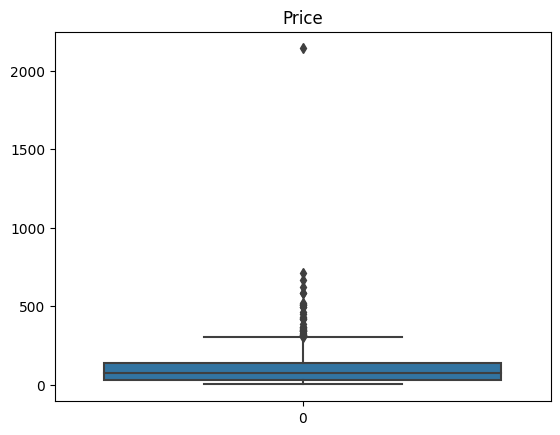

In [113]:
# reset all the index
df_clean_ProductRegion.reset_index(drop=True, inplace=True)

# plot boxplot for 'Price' column
sns.boxplot(df_clean_ProductRegion['Price'])

# set plot title
plt.title('Price')

# show the plot
plt.show()

The boxplot shows there are outliers

In [114]:
# find the mean and sd of Price column
df_clean_ProductRegion.describe(include = 'all')

,Product,Region,Price,Units Sold,Sale Date
count,810,810,725.000000,731.000000,810
unique,50,10,NaN,NaN,810
top,Product_5,Region_9,NaN,NaN,2022-01-03
freq,28,96,NaN,NaN,1
mean,NaN,NaN,106.942331,10.103967,NaN
std,NaN,NaN,129.246684,3.229169,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.000000,8.000000,NaN
50%,NaN,NaN,76.010000,10.000000,NaN
75%,NaN,NaN,139.560000,12.000000,NaN


In [115]:
# calculate the outlier: Mean + 3*sd value of Price column
outlier_price = 108.624987 + 3*122.623788	

In [116]:
df_clean_ProductRegion = df_clean_ProductRegion.drop(df_clean_ProductRegion[df_clean_ProductRegion['Price'] > outlier_price].index)

# reset the index
df_clean_ProductRegion.reset_index(drop=True, inplace=True)

df_clean_ProductRegion.describe(include = 'all')

,Product,Region,Price,Units Sold,Sale Date
count,798,798,713.000000,721.000000,798
unique,50,10,NaN,NaN,798
top,Product_5,Region_9,NaN,NaN,2022-01-03
freq,28,95,NaN,NaN,1
mean,NaN,NaN,97.038317,10.108183,NaN
std,NaN,NaN,88.083512,3.241990,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,28.450000,8.000000,NaN
50%,NaN,NaN,74.270000,10.000000,NaN
75%,NaN,NaN,134.580000,12.000000,NaN


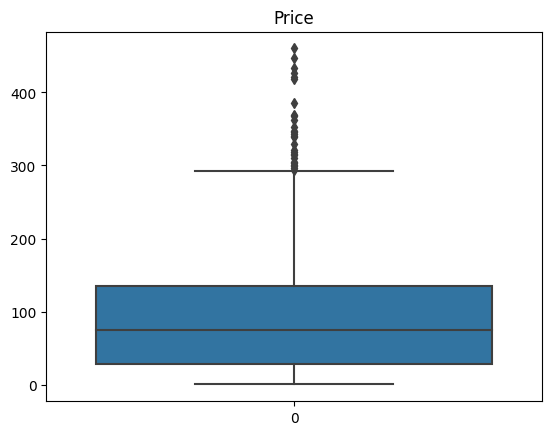

In [117]:
# plot the boxplot again
sns.boxplot(df_clean_ProductRegion['Price'])

# set plot title
plt.title('Price')

# show plot
plt.show()

### Units Sold column

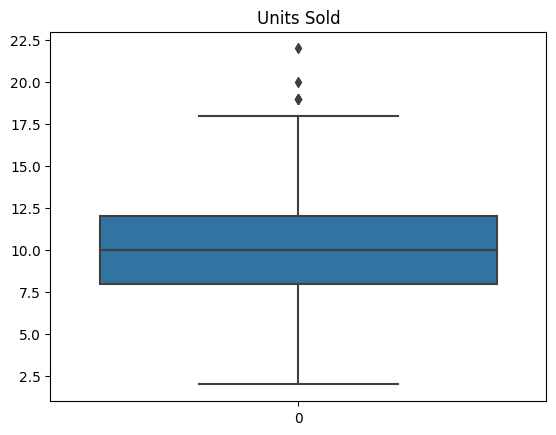

In [118]:
# reset the index
df_clean_ProductRegion.reset_index(drop=True, inplace=True)

# plot the boxplot of the 'Units Sold' column
sns.boxplot(data = df_clean_ProductRegion['Units Sold'])

# set plot title
plt.title('Units Sold')

# show the plot
plt.show()

The Units Sold column is normally distributed, so no need to clean outliers

# Data Cleaning (1.3): Fill Null value for Price and Unit sold columns

In [119]:
# show the number of missing value 
df_clean_ProductRegion.isnull().sum()

Product        0
Region         0
Price         85
Units Sold    77
Sale Date      0
dtype: int64

Clean fill the missing value in 'Units Sold' column

In [120]:
# calculate the mean of Units Sold
mean_unit_PR = df_clean_ProductRegion['Units Sold'].mean()

# fill missing value in Unit Sold column with mean of the column
df_clean_ProductRegion.loc[:, 'Units Sold'] = df_clean_ProductRegion['Units Sold'].copy().fillna(mean_unit_PR)

# check if there are missing value in the column
df_clean_ProductRegion.isnull().sum()

Product        0
Region         0
Price         85
Units Sold     0
Sale Date      0
dtype: int64

Clean fill the missing value in 'Price' column

In [121]:
# calculate the mean of Price
mean_price_PR = df_clean_ProductRegion['Price'].mean()

# fill missing value in Price column with mean of the column
df_clean_ProductRegion.loc[:, 'Price'] = df_clean_ProductRegion['Price'].copy().fillna(mean_price_PR)

# check if there are missing value in the column
df_clean_ProductRegion.isnull().sum()

Product       0
Region        0
Price         0
Units Sold    0
Sale Date     0
dtype: int64

There are not missing value in the Dataframe

# Performance Analysis (2.1): Creation of 'Revenue' Column

In [123]:
# create Revenue column
df_clean_ProductRegion['Revenue'] = df_clean_ProductRegion['Price'] * df_clean_ProductRegion['Units Sold']

In [124]:
# show the dataframe and see if the revenue column is created
df_clean_ProductRegion.head(10)

,Product,Region,Price,Units Sold,Sale Date,Revenue
0,Product_46,Region_3,20.430000,12.0,2022-01-03,245.160000
1,Product_36,Region_1,12.770000,10.0,2022-01-04,127.700000
2,Product_17,Region_6,125.690000,6.0,2022-01-05,754.140000
3,Product_45,Region_1,8.630000,11.0,2022-01-06,94.930000
4,Product_31,Region_3,23.730000,6.0,2022-01-07,142.380000
5,Product_18,Region_7,19.270000,9.0,2022-01-08,173.430000
6,Product_16,Region_9,30.700000,14.0,2022-01-09,429.800000
7,Product_9,Region_2,264.050000,7.0,2022-01-10,1848.350000
8,Product_20,Region_3,97.038317,8.0,2022-01-11,776.306536
9,Product_1,Region_4,63.040000,9.0,2022-01-12,567.360000


# Performance Analysis (2.2): Analyse Product Performance

In [131]:
# create dataframe group by Product and apply aggregate function on sum of Revenue  
df_clean_P_Revenue = df_clean_ProductRegion.groupby('Product')['Revenue'].sum().reset_index()

# sort the data in Descending order
df_clean_P_Revenue = df_clean_P_Revenue.sort_values('Revenue', ascending=False)

# print the dataframe
print(df_clean_P_Revenue)

       Product       Revenue
45  Product_50  26347.737908
23  Product_30  24174.736505
11   Product_2  23907.168438
42  Product_48  23063.300000
7   Product_16  21880.526438
34  Product_40  21857.016727
21  Product_29  21205.918244
10  Product_19  20349.516339
33   Product_4  20267.711689
4   Product_13  19415.355501
15  Product_23  19176.721598
24  Product_31  18528.380000
5   Product_14  18026.119831
44   Product_5  17822.933683
17  Product_25  17440.130666
27  Product_34  17439.852509
35  Product_41  17434.746241
43  Product_49  17336.050000
12  Product_20  17321.606145
40  Product_46  17319.132250
26  Product_33  17072.189936
38  Product_44  16246.116380
47   Product_7  16056.089411
8   Product_17  15507.253257
30  Product_37  15295.249037
16  Product_24  15248.902560
37  Product_43  14818.234979
0    Product_1  14210.434558
19  Product_27  13850.992353
32  Product_39  13790.630749
13  Product_21  13705.798890
20  Product_28  13545.021828
41  Product_47  12862.320408
36  Product_42

The best selling product is Product_50 and the worst popular product is Product_3

In [132]:
df_clean_P_Revenue.describe(include='all')

,Product,Revenue
count,50,50.000000
unique,50,NaN
top,Product_50,NaN
freq,1,NaN
mean,NaN,15417.983105
std,NaN,4694.995880
min,NaN,4904.558219
25%,NaN,12226.830283
50%,NaN,15272.075798
75%,NaN,17975.323294


Show the Top 10 Best selling Products

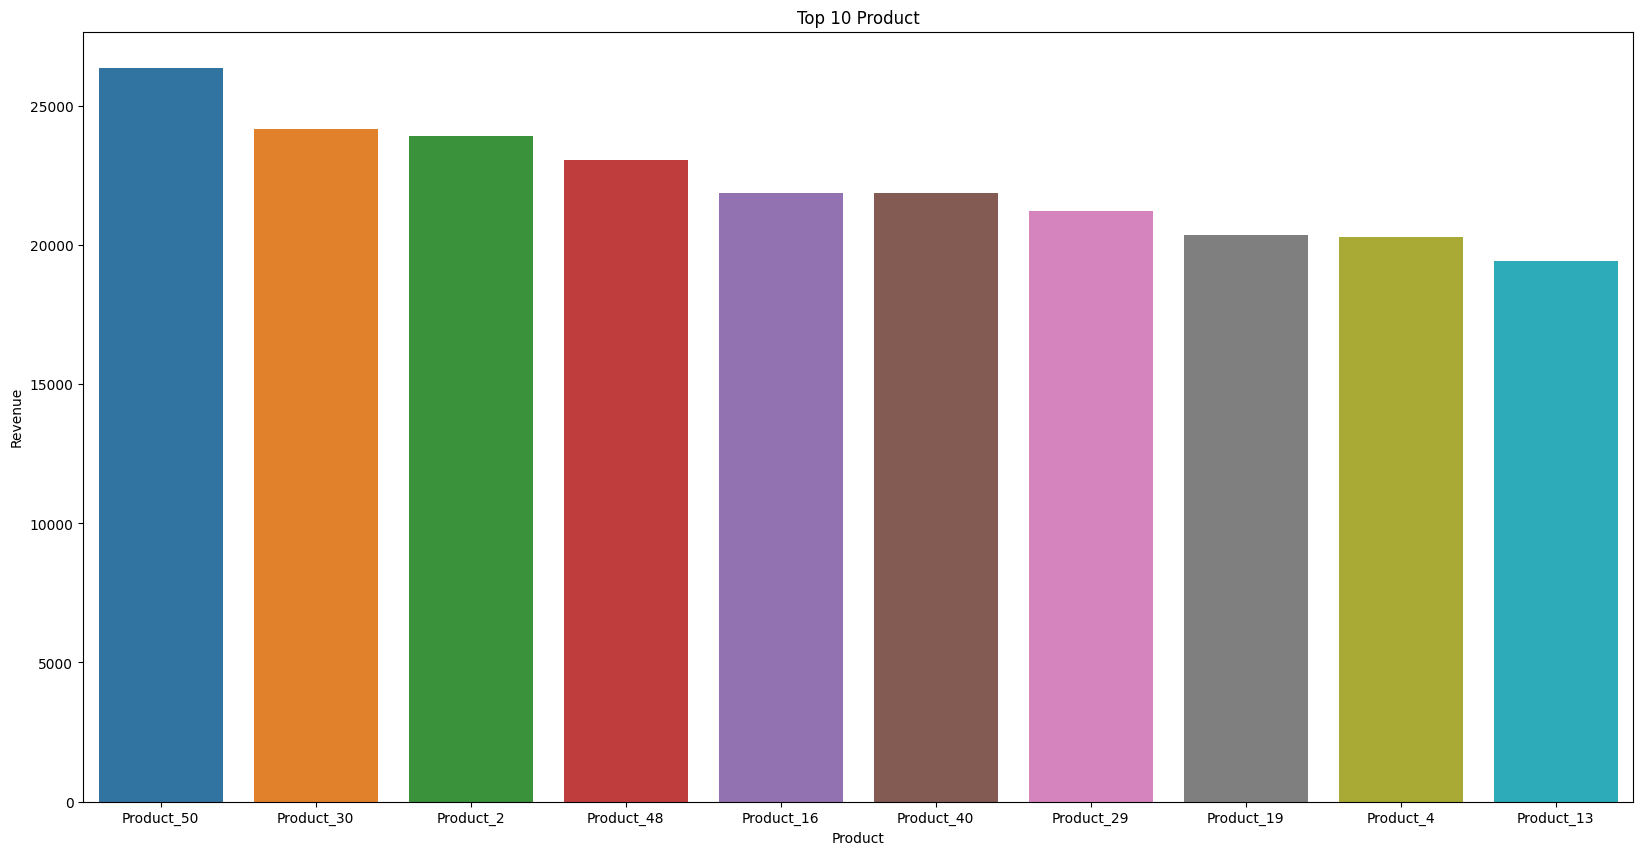

In [126]:
# Select top 10 Best selling Products
Top10_Product = df_clean_P_Revenue.head(10)

# set the plot size
plt.figure(figsize=(20, 10))

# plot the bar plot of the top 10 products
sns.barplot(x='Product', y='Revenue', data = Top10_Product, errorbar=None)

# set the plot title
plt.title('Top 10 Product')

# show the plot
plt.show()


# Performance Analysis (2.3): Analyse Regional Performance

In [135]:
# create dataframe group by Product and apply aggregate function on sum of Product
df_clean_R_Revenue = df_clean_ProductRegion.groupby('Region')['Revenue'].sum().reset_index()

# sort the data in Descending order
df_clean_R_Revenue = df_clean_R_Revenue.sort_values('Revenue', ascending=False)

# print the dataframe
print(df_clean_R_Revenue)

      Region        Revenue
9   Region_9  101348.581562
8   Region_8   92914.962278
4   Region_4   88887.184399
1  Region_10   85842.771058
5   Region_5   79940.789207
2   Region_2   79019.239477
3   Region_3   66689.780252
6   Region_6   63868.999451
0   Region_1   61396.426234
7   Region_7   50990.421320


Region_9 is having the best sales performance, whike Region_7 is having the worst

Show the performance of the Region in chart

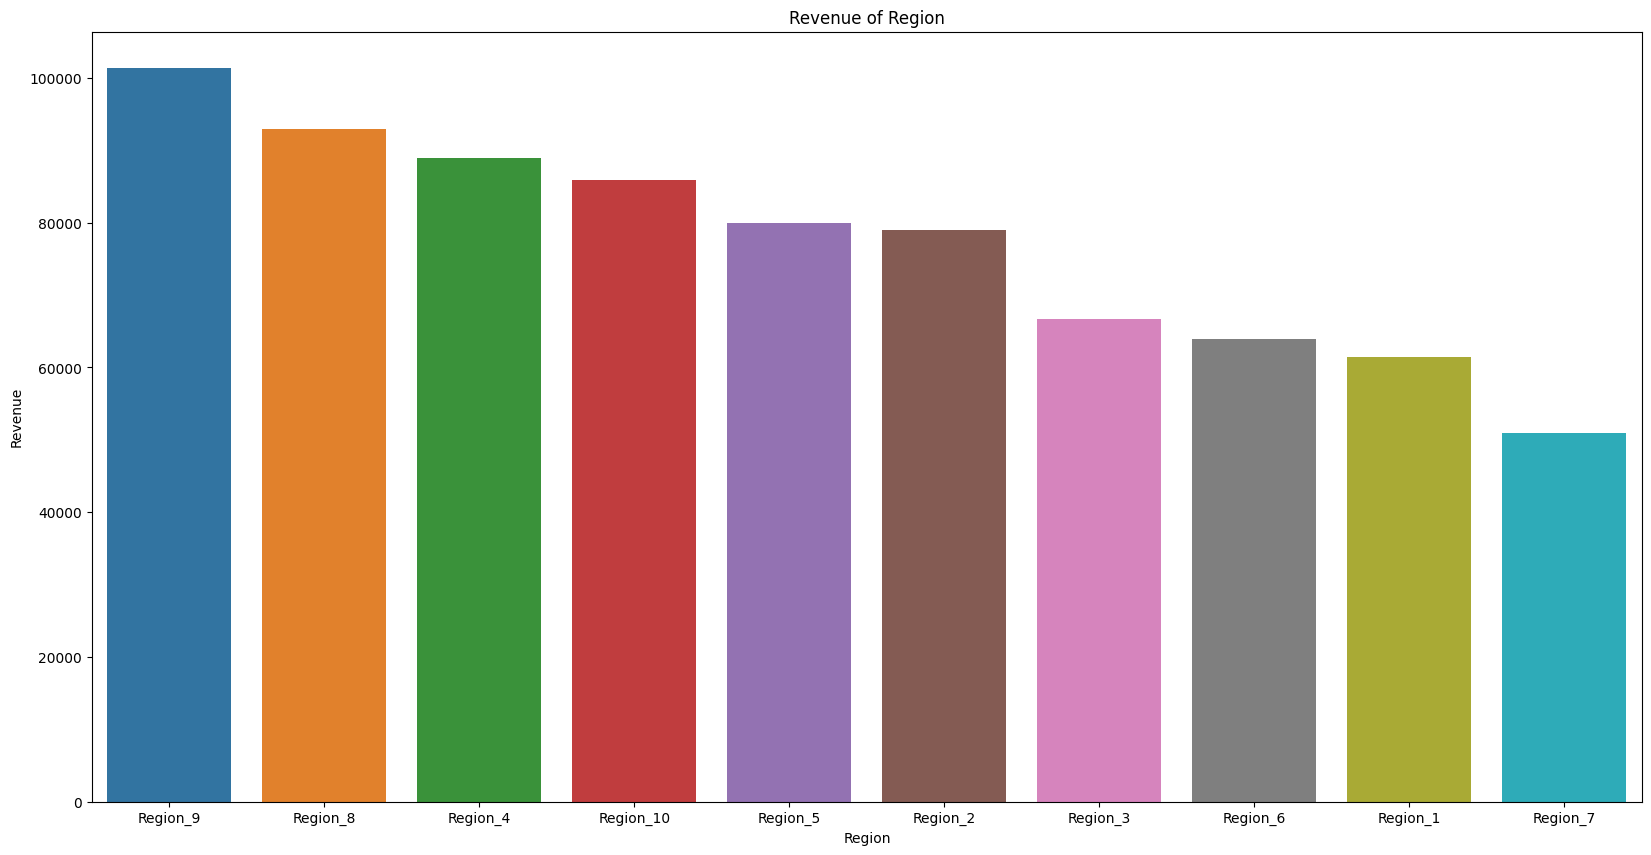

In [136]:
# set the plot size
plt.figure(figsize=(20, 10))

# plot the bar plot of the Regional Revenue
sns.barplot(x='Region', y='Revenue', data = df_clean_R_Revenue, errorbar=None)

# set the plot title
plt.title('Revenue of Region')

# show the plot
plt.show()

# Investigate the price of the Top 10 Products

In [160]:
# change the Top 10 product dataframe to list
t10_list = Top10_Product['Product'].tolist()

# run a for loop to find out the mean and sd of the Top 10 Product's price
for i in t10_list:
    product_price = df_clean_ProductRegion[df_clean_ProductRegion['Product'] == i]['Price'].to_frame()
    print(product_price.describe(include = 'all'))

            Price
count   21.000000
mean   111.185474
std    108.235238
min      1.360000
25%     51.820000
50%     86.730000
75%    146.870000
max    447.750000
            Price
count   19.000000
mean   120.916316
std     95.940168
min      4.860000
25%     38.355000
50%    100.800000
75%    175.435000
max    385.960000
            Price
count   18.000000
mean   128.792497
std    109.395061
min      2.140000
25%     54.360000
50%     97.038317
75%    178.130000
max    347.200000
            Price
count   18.000000
mean   112.101667
std    108.176534
min      7.130000
25%     30.567500
50%     77.605000
75%    149.750000
max    418.240000
            Price
count   18.000000
mean   103.798795
std    121.382741
min      0.960000
25%     16.480000
50%     59.235000
75%    150.334579
max    433.170000
            Price
count   17.000000
mean   145.816471
std    129.995545
min      3.480000
25%     48.830000
50%     97.080000
75%    176.560000
max    426.020000
           Price
count   18.

The result shows that almost all the products are having mean and sd close to 100, which shows that the price of the product is having a large variation.